In [28]:
import numpy as np
import nibabel as nib
from dipy.io import streamline
import os
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [29]:

project_dir = os.path.abspath('/om2/user/ksitek/maastricht/diffusion_faruk/')
processing_dir = os.path.join(project_dir, 'analysis/fathresh-0.5/')
analysis_dir = os.path.join(project_dir, 'analysis/dipy_csd_func-atlas_shift_vox-4_ax-1/')
'''
project_dir = os.path.abspath('/om2/user/ksitek/exvivo/')
#sl_dir = os.path.join(project_dir, 'analysis/dipy_csd/fathresh-0.1_0.2mm/target_streamlines')
sl_dir = os.path.join(project_dir, 'analysis/dipy_csd/fathresh-0.1_0.2mm_8-structure_201812/target_streamlines')
'''

"\nproject_dir = os.path.abspath('/om2/user/ksitek/exvivo/')\n#sl_dir = os.path.join(project_dir, 'analysis/dipy_csd/fathresh-0.1_0.2mm/target_streamlines')\nsl_dir = os.path.join(project_dir, 'analysis/dipy_csd/fathresh-0.1_0.2mm_8-structure_201812/target_streamlines')\n"

In [30]:
labels = ['LH_CN', 'LH_SOC', 'LH_IC', 'LH_MGB',
          'RH_CN', 'RH_SOC', 'RH_IC', 'RH_MGB']
labels_atlas = ['LH_CN', 'RH_CN', 'LH_SOC', 'RH_SOC', 
          'LH_IC', 'RH_IC', 'LH_MGB', 'RH_MGB']
label_order = list(range(1,9)) # if regions are already in same order as labels

In [31]:
sublist = ['S01','S02','S03','S05','S06','S07','S08','S09','S10','S11'] # 'S02'
#sublist = ['S02']

In [32]:
# test it out
sl_dir = os.path.join(analysis_dir, sublist[0], 'target_streamlines')
sl_file = os.path.join(sl_dir, 'merge_all_atlas_streamlines.trk')
streamlines, hdr = streamline.load_trk(sl_file)
print('network streamlines = ', hdr['nb_streamlines'])

network streamlines =  3865


In [33]:
allsub_norm_matrix_sl = np.zeros((len(sublist),len(labels),len(labels)))

for sx, sub in enumerate(sublist):
    sl_dir = os.path.join(analysis_dir, sub, 'target_streamlines')
    print(sl_dir)
    
    # get 
    #sl_file = os.path.join(sl_dir, 'merge_all_atlas_streamlines.trk')
    sl_file = os.path.join(processing_dir, sub, 'recon/%s_csd_streamline.trk'%sub)
    streamlines, hdr = streamline.load_trk(sl_file)
    total_sl_count = hdr['nb_streamlines']
    print('%s total subcortical streamlines = %d'%(sub,total_sl_count))

    matrix_sl = np.zeros((len(labels), len(labels)))
    for i, seed_label in enumerate(labels):
    #for i, seed in enumerate(label_order):
        #seed_label = labels_atlas[seed-1]
        print('seed: %s'%seed_label)
        for j, target_label in enumerate(labels):
        #for j, target in enumerate(label_order):
            #target_label = labels_atlas[target-1]
            print('     target: %s'%target_label)
            try: 
                sl_file = os.path.join(sl_dir, 'target_streamlines_seed-%s_target-%s.trk'%(seed_label, target_label))
                #sl_file = os.path.join(sl_dir, 'target_streamlines_seed-%d_target-%d.trk'%(seed, target))
                streamlines, hdr = streamline.load_trk(sl_file)
                #sl_count = streamlines[0][0].shape[0]
                sl_count = hdr['nb_streamlines']
                print('             %d'%sl_count)
            except: sl_count = 0
            matrix_sl[i,j] = sl_count
            #matrix_sl[seed-1, target-1] = sl_count
    matrix_sl = matrix_sl.astype(np.int) # convert to integers
    
    norm_matrix_sl = matrix_sl/total_sl_count*100
    print(matrix_sl)
    print(norm_matrix_sl)
    
    # save to 3D allsub matrix
    allsub_norm_matrix_sl[sx,:,:] = norm_matrix_sl
    
    '''
    # make plot
    plt.clf()
    mask = np.zeros_like(norm_matrix_sl)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(norm_matrix_sl, annot=True, fmt=".01f", linewidths=.5,# ax=ax,
                    xticklabels=labels, yticklabels=labels, square=True,#mask=mask, 
                    cmap="Reds", cbar=False);
    ax.set(title='%s percent of total streamlines (n = %d)'%(sub,total_sl_count));
    plt.tight_layout()
    
    # save plot
    out_file = os.path.join(sl_dir, '%s_streamline_norm_heatplot.png'%sub)
    ax.figure.savefig(out_file, box_inches='tight', dpi=200)
    
    
    # make plot
    plt.clf()
    mask = np.zeros_like(matrix_sl)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        ax = sns.heatmap(matrix_sl, annot=True, fmt="d", linewidths=.5,# ax=ax,
                    xticklabels=labels, yticklabels=labels, square=True,#mask=mask, 
                    cmap="Reds", cbar=False);
    ax.set(title='%s number of streamlines'%sub);
    plt.tight_layout()
    
    # save plot
    out_file = os.path.join(sl_dir, '%s_streamline_heatplot.png'%sub)
    ax.figure.savefig(out_file, box_inches='tight', dpi=200)
    '''

/om2/user/ksitek/maastricht/diffusion_faruk/analysis/dipy_csd_func-atlas_shift_vox-4_ax-1/S01/target_streamlines
S01 total subcortical streamlines = 8090
seed: LH_CN
     target: LH_CN
     target: LH_SOC
     target: LH_IC
     target: LH_MGB
     target: RH_CN
     target: RH_SOC
     target: RH_IC
     target: RH_MGB
seed: LH_SOC
     target: LH_CN
     target: LH_SOC
     target: LH_IC
     target: LH_MGB
     target: RH_CN
     target: RH_SOC
     target: RH_IC
     target: RH_MGB
seed: LH_IC
     target: LH_CN
     target: LH_SOC
     target: LH_IC
     target: LH_MGB
     target: RH_CN
     target: RH_SOC
     target: RH_IC
     target: RH_MGB
seed: LH_MGB
     target: LH_CN
     target: LH_SOC
     target: LH_IC
     target: LH_MGB
     target: RH_CN
     target: RH_SOC
     target: RH_IC
     target: RH_MGB
seed: RH_CN
     target: LH_CN
     target: LH_SOC
     target: LH_IC
     target: LH_MGB
     target: RH_CN
     target: RH_SOC
     target: RH_IC
     target: RH_MGB
seed

S07 total subcortical streamlines = 6742
seed: LH_CN
     target: LH_CN
     target: LH_SOC
     target: LH_IC
     target: LH_MGB
     target: RH_CN
     target: RH_SOC
     target: RH_IC
     target: RH_MGB
seed: LH_SOC
     target: LH_CN
     target: LH_SOC
     target: LH_IC
     target: LH_MGB
     target: RH_CN
     target: RH_SOC
     target: RH_IC
     target: RH_MGB
seed: LH_IC
     target: LH_CN
     target: LH_SOC
     target: LH_IC
     target: LH_MGB
     target: RH_CN
     target: RH_SOC
     target: RH_IC
     target: RH_MGB
seed: LH_MGB
     target: LH_CN
     target: LH_SOC
     target: LH_IC
     target: LH_MGB
     target: RH_CN
     target: RH_SOC
     target: RH_IC
     target: RH_MGB
seed: RH_CN
     target: LH_CN
     target: LH_SOC
     target: LH_IC
     target: LH_MGB
     target: RH_CN
     target: RH_SOC
     target: RH_IC
     target: RH_MGB
seed: RH_SOC
     target: LH_CN
     target: LH_SOC
     target: LH_IC
     target: LH_MGB
     target: RH_CN
     ta

In [11]:
streamlines

ArraySequence([array([[ 1.67985535e+01, -8.02706909e+00, -5.74835052e+01],
       [ 1.65991745e+01, -7.68880463e+00, -5.71350060e+01],
       [ 1.64004517e+01, -7.35526276e+00, -5.67816048e+01],
       [ 1.62014465e+01, -7.02262878e+00, -5.64275246e+01],
       [ 1.59985046e+01, -6.69084549e+00, -5.60748749e+01],
       [ 1.57897568e+01, -6.37677383e+00, -5.57096252e+01],
       [ 1.55798645e+01, -6.07186508e+00, -5.53373413e+01],
       [ 1.53728256e+01, -5.76756287e+00, -5.49629555e+01],
       [ 1.51631165e+01, -5.47830582e+00, -5.45782814e+01],
       [ 1.49440689e+01, -5.19784164e+00, -5.41922951e+01],
       [ 1.47164230e+01, -4.91624451e+00, -5.38121529e+01],
       [ 1.44770889e+01, -4.64241409e+00, -5.34335251e+01],
       [ 1.42142410e+01, -4.39094925e+00, -5.30549698e+01],
       [ 1.39387283e+01, -4.15235901e+00, -5.26770859e+01],
       [ 1.36504517e+01, -3.92724991e+00, -5.23004723e+01],
       [ 1.33404388e+01, -3.71112061e+00, -5.19360428e+01],
       [ 1.30057755e+01, 

In [12]:
print(hdr['nb_streamlines'])
print(streamlines[0].shape)
print(streamlines[0][0].shape)

7062
(85, 3)
(3,)


In [13]:
allsub_norm_matrix_sl.shape

(1, 8, 8)

## Heat map of population average streamline connectivity between ROIs

In [14]:
mean_norm_matrix_sl = np.mean(allsub_norm_matrix_sl,0)
mean_norm_matrix_sl

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
# create a custom color palette so that 0 is white (not light red)
new_cp = sns.color_palette("Reds",n_colors=1000)
new_cp[0] = [1,1,1]
new_cp[0:10]

[[1, 1, 1],
 (1.0, 0.9607843137254902, 0.9411764705882353),
 (1.0, 0.9607843137254902, 0.9411764705882353),
 (0.9998769703960015, 0.9582006920415225, 0.9374855824682814),
 (0.9998769703960015, 0.9582006920415225, 0.9374855824682814),
 (0.9998769703960015, 0.9582006920415225, 0.9374855824682814),
 (0.9998769703960015, 0.9582006920415225, 0.9374855824682814),
 (0.9997539407920031, 0.9556170703575548, 0.9337946943483275),
 (0.9997539407920031, 0.9556170703575548, 0.9337946943483275),
 (0.9997539407920031, 0.9556170703575548, 0.9337946943483275)]

In [16]:
mat_annot = np.array([])
print(mat_annot)
for row in mean_norm_matrix_sl:
    for val in row:
        if val>0:
            mat_annot.append(str(val))

[]


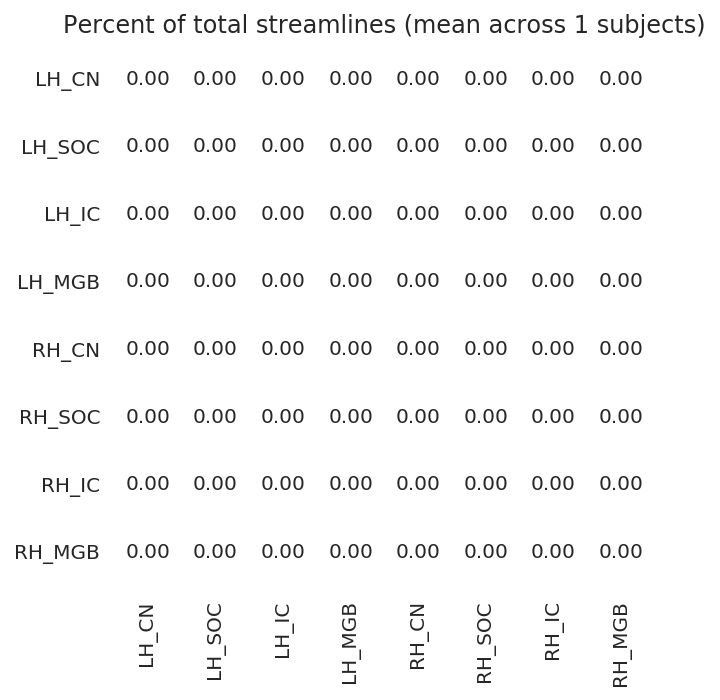

In [17]:
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(5, 5));

mask = np.zeros_like(mean_norm_matrix_sl)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(mean_norm_matrix_sl, annot=mean_norm_matrix_sl, fmt=".02f", linewidths=0.2,# ax=ax,
                xticklabels=labels, yticklabels=labels, square=True,#mask=mask, 
                cmap=new_cp, cbar=False);
ax.set(title='Percent of total streamlines (mean across %s subjects)'%(len(sublist)));
plt.tight_layout();

# save plot
out_file = os.path.join(analysis_dir, 'mean_streamline_norm_heatplot.png');
ax.figure.savefig(out_file, box_inches='tight', dpi=200);


In [18]:
print(out_file)

/om2/user/ksitek/maastricht/diffusion_faruk/analysis/dipy_csd_func-atlas_shift_vox-4_ax-1/mean_streamline_norm_heatplot.png


## Boxplot of ROI-specific streamline counts

In [19]:
(mean_norm_matrix_sl).shape

(8, 8)

In [20]:
allsub_perroi = np.sum(allsub_norm_matrix_sl, axis=2)
allsub_perroi.shape

(1, 8)

In [21]:
allsub_perroi

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
import pandas as pd

In [23]:
perroi = pd.DataFrame(allsub_perroi, index=sublist, columns=labels)
perroi

,LH_CN,LH_SOC,LH_IC,LH_MGB,RH_CN,RH_SOC,RH_IC,RH_MGB
S02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
melt_perroi = pd.melt(perroi, value_vars=perroi.columns.tolist())
melt_perroi.head()

,variable,value
0,LH_CN,0.0
1,LH_SOC,0.0
2,LH_IC,0.0
3,LH_MGB,0.0
4,RH_CN,0.0


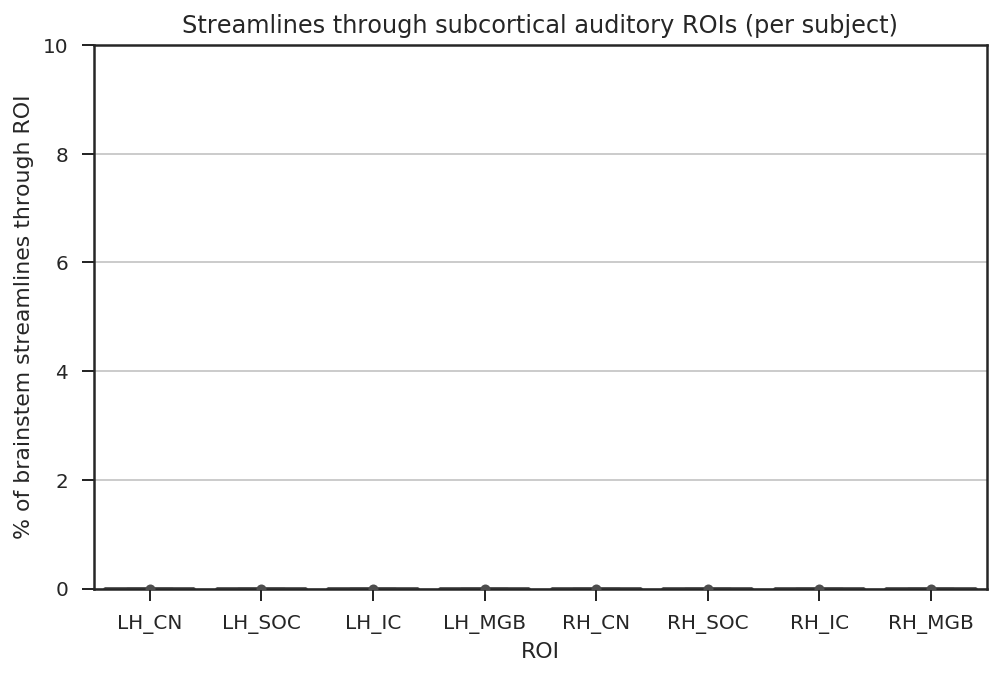

In [25]:
sns.set(style="ticks")

fig, ax = plt.subplots(figsize=(8, 5))
g = sns.boxplot(data=melt_perroi, x='variable',y='value', palette="vlag");
g = sns.swarmplot(x="variable", y="value", data=melt_perroi,
              size=5, color=".3", linewidth=0)

g.set(ylim=(0, 10), xlabel='ROI', ylabel='% of brainstem streamlines through ROI', 
      title='Streamlines through subcortical auditory ROIs (per subject)');
#plt.xticks(rotation=90);
ax.yaxis.grid(True)

# save plot
out_file = os.path.join(analysis_dir, 'streamline_norm_boxplot.png')
ax.figure.savefig(out_file, box_inches='tight', dpi=200)
